In [8]:
import seaborn
from matplotlib import pyplot as plt
import statistics as st
import random
import math
%matplotlib inline

In [9]:
def flipper():
    return random.choice([0,1])

In [3]:
def sim(coin, num):
    k = int(math.log2(num))
    if 2**k == num:
        return {m:[coin() for _ in range(m)] for m in
                [2**(n+1)-2**n for n in range(k+1)]}
        
    nums = {m:[coin() for _ in range(m)] for m in 
            [2**(n+1) - 2**n for n in range(k+1)]}
    nums[num] = [coin() for _ in range(num - 2**k)]
    return nums

In [4]:
current_data = sim(flipper, 20)
def plotter_diff(data):
    nums = sorted([item for item in data.keys()])
    diff = [2*sum(data[item])-len(data[item]) for item in nums]
    return nums, diff

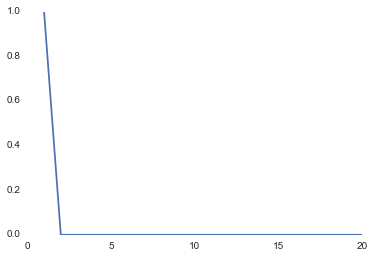

In [5]:
plt.plot(*plotter_diff(current_data))

In [6]:
def rat(items):
    if sum(items) != len(items):
        return sum(items)/(len(items) - sum(items))
    else:
        return 0

def plotter_ratio(data):
    nums = sorted([item for item in data.keys()])
    ratio = [rat(data[item]) for item in nums]
    
    return nums, ratio

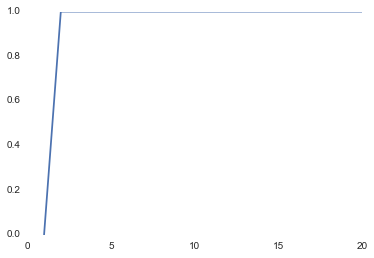

In [7]:
plt.plot(*plotter_ratio(current_data))

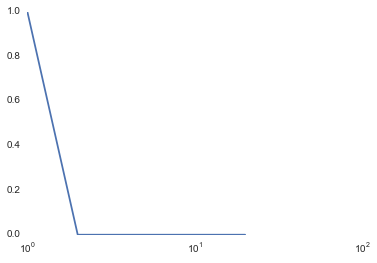

In [8]:
plt.xscale('log')
plt.plot(*plotter_diff(current_data))

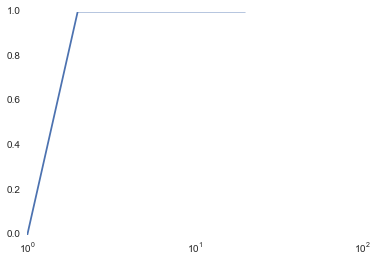

In [9]:
plt.xscale('log')
plt.plot(*plotter_ratio(current_data))

In [29]:
data_list = [sim(flipper, 2**16) for _ in range(20)]

In [11]:
def average(items):
    return sum(items)/len(items)

def ratios(data_list):
    new_list = []
    nums = sorted([item for item in data_list[0].keys()])
    for data in data_list:
        new_list.append([rat(data[item])
                         for item in nums])
    
    return nums, new_list
    
def scatter_ratio(data_list):
    nums, data_list = ratios(data_list)
    
    vals = [[values[idx] for values in data_list]
            for idx in range(len(nums))]
        
    new_list = [average(item) for item in vals]
    
    return plt.scatter(nums, new_list)

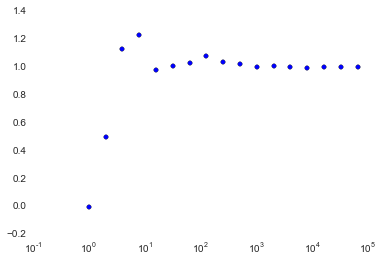

In [30]:
plt.xscale('log')
scatter_ratio(data_list)

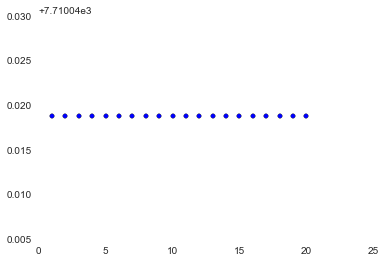

In [31]:
plt.scatter(range(1,len(data_list)+1), [st.mean(item) for
                                        item in data_list])

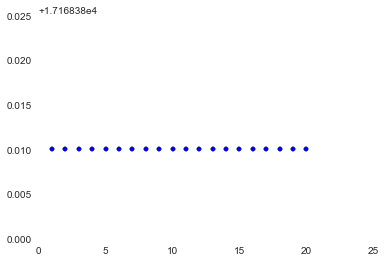

In [32]:
plt.scatter(range(1,len(data_list)+1), [st.stdev(item) for 
                                      item in data_list])

In [4]:
def simple_sim(coin, num):
    return sum([random.choice([0,1]) for _ in range(num)])

In [ ]:
data_list = [simple_sim(flipper, 100)/100 for _ in range(100000)]

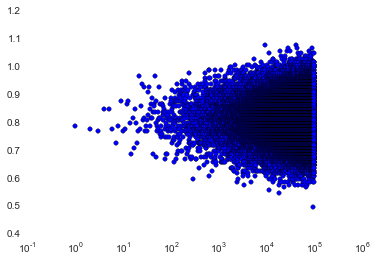

In [25]:
plt.xscale('log')
plt.scatter(range(1, 100001), data_list)

{'boxes': [<matplotlib.lines.Line2D at 0x108f2eef0>],
 'caps': [<matplotlib.lines.Line2D at 0x1092c7ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1092d12e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1092ccac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1092c1a58>,
  <matplotlib.lines.Line2D at 0x1092c72e8>]}

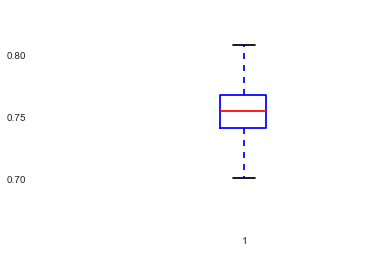

In [28]:
plt.xscale('log')
plt.boxplot(data_list)

In [10]:
data_list = [simple_sim(flipper, 1000)/1000 for _ in range(100000)]

In [ ]:
plt.xscale('log')
plt.scatter(range(1, 100001), data_list)

In [ ]:
plt.xscale('log')
plt.boxplot(data_list)